In [1]:
##### Se estiver executando no COLAB rode esta linha e restart o Kernel em seguida
#!python -m spacy download pt_core_news_sm

In [2]:
#Se tiver exwecutando no Colab rode esta célula
#from google.colab import drive
#drive.mount('/content/gdrive')
#import sys
#sys.path.insert(0,'/content/gdrive/My Drive/TCC/tcccimatec')
#caminhoDados="/content/gdrive/My Drive/TCC/tcccimatec/dados/"


In [3]:
#Dados disponíveis em 
#https://drive.google.com/drive/folders/111ViaBRVmR0uevl00Ivmy3tbqMLjqIX7?usp=sharing

In [1]:
#Se estiver rodando localmente 
caminhoDados="dados/"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import nltk
from nltk.corpus import stopwords
import re
from unicodedata import normalize
from nltk.tokenize import RegexpTokenizer, WordPunctTokenizer, WhitespaceTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import html
import spacy
from libs import stopword, tratatexto

nlp = spacy.load('pt_core_news_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
random_state=26

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/94779325587/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/94779325587/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/94779325587/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Análise Exploratória

In [3]:
df  = pd.read_json(caminhoDados+'segmentosOrigemAnotacao.json') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21307 entries, 0 to 21306
Data columns (total 14 columns):
ano                  21307 non-null int64
ementa               21307 non-null object
idAto                21307 non-null int64
idSegmentoOrigem     21307 non-null int64
idTipoAnotacao       21307 non-null int64
idTipoAto            21307 non-null int64
idTipoSegmento       21307 non-null int64
nomeTipoAnotacao     21307 non-null object
nomeTipoAto          21307 non-null object
nomeTipoSegmento     21307 non-null object
siglaTipoAnotacao    21307 non-null object
textoIntegra         21307 non-null object
tipoSolucao          21307 non-null object
versaoSegmento       21307 non-null int64
dtypes: int64(7), object(7)
memory usage: 2.3+ MB


In [5]:
df['ano'].unique() #todos os anos da base

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [6]:
#Excluindo o ano de 2021  por não estar completo
df = df[df['ano']<2021]
df.head()

,ano,ementa,idAto,idSegmentoOrigem,idTipoAnotacao,idTipoAto,idTipoSegmento,nomeTipoAnotacao,nomeTipoAto,nomeTipoSegmento,siglaTipoAnotacao,textoIntegra,tipoSolucao,versaoSegmento
0,2013,Autoriza exportação de cigarros do estabelecim...,39246,1260061,24,9,3,Vide,Ato Declaratório Executivo,Artigo,VID,Art. 2º A autorização de que trata o art. 1º f...,REF,1
1,2013,"Altera a Instrução Normativa SRF nº 588, de 21...",39255,1260829,1,42,999,Alteração,Instrução Normativa,Não Identificado,RedaÃ§Ã£o dada,“Art. 17. As entidades fechadas de previdência...,ALT,1
2,2013,"Altera a Instrução Normativa SRF nº 588, de 21...",39255,1260830,3,42,5,Inclusão,Instrução Normativa,Parágrafo,INC,Parágrafo único. O disposto no caput aplica-s...,INC,1
3,2013,Dispõe sobre o reajuste dos benefícios pagos p...,39283,1262698,9,80,3,Revogação,Portaria Interministerial,Artigo,RVO,Art. 12. Fica revogada a Portaria Interministe...,EXC,1
4,2013,Dispõe sobre o reajuste dos benefícios pagos p...,39289,1263242,9,80,3,Revogação,Portaria Interministerial,Artigo,RVO,Art. 12. Fica revogada a Portaria Interministe...,EXC,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 21306
Data columns (total 14 columns):
ano                  21012 non-null int64
ementa               21012 non-null object
idAto                21012 non-null int64
idSegmentoOrigem     21012 non-null int64
idTipoAnotacao       21012 non-null int64
idTipoAto            21012 non-null int64
idTipoSegmento       21012 non-null int64
nomeTipoAnotacao     21012 non-null object
nomeTipoAto          21012 non-null object
nomeTipoSegmento     21012 non-null object
siglaTipoAnotacao    21012 non-null object
textoIntegra         21012 non-null object
tipoSolucao          21012 non-null object
versaoSegmento       21012 non-null int64
dtypes: int64(7), object(7)
memory usage: 2.4+ MB


In [8]:
#Verificando valores nulos
df.isna().sum()

ano                  0
ementa               0
idAto                0
idSegmentoOrigem     0
idTipoAnotacao       0
idTipoAto            0
idTipoSegmento       0
nomeTipoAnotacao     0
nomeTipoAto          0
nomeTipoSegmento     0
siglaTipoAnotacao    0
textoIntegra         0
tipoSolucao          0
versaoSegmento       0
dtype: int64

In [9]:
#unificando o nome da coluna idSegmento
df.rename(columns={'idSegmentoOrigem': 'idSegmento'},inplace=True)

In [10]:
#Quantidade de segmentos anotados por tipo de Solução
#Percebemos que alguns segmentos tem mais de uma anotação, esses casos não serão escopo desse trabalho
#o alvo são segmentos que só possuem uma anotação
df.groupby(["idSegmento"])["nomeTipoAnotacao"].nunique().sort_values(ascending=False)
dfseg = pd.DataFrame(df.groupby(["idSegmento"])["nomeTipoAnotacao"].nunique())
excluir = dfseg[dfseg['nomeTipoAnotacao']>1].index
#Quantidade de segmentos a exluir
len(excluir)
df.drop(df[df['idSegmento'].isin(excluir)].index, inplace = True)

In [11]:
#Quantidade de segmentos anotados por tipo de Solução
df.groupby(["tipoSolucao"])["idSegmento"].nunique().sort_values(ascending=False)

tipoSolucao
ALT    8423
INC    6639
EXC    3823
REF    1162
REP     233
REN      18
Name: idSegmento, dtype: int64

In [12]:
#Anotações por tipo de Solução
df['tipoSolucao'].value_counts().sort_values(ascending=False)

ALT    8426
INC    6640
EXC    3823
REF    1162
REP     233
REN      18
Name: tipoSolucao, dtype: int64

In [13]:
#Anotações por tipo de anotação, existem 28 com valor vazio
df['nomeTipoAnotacao'].value_counts()

Alteração                  6785
Inclusão                   6612
Revogação                  3439
Retificação                1638
Vide                       1002
Republicação                233
Sem Efeito                  200
Anulação                    123
Prorrogação                 115
Prorrogação de Vigência      42
Prejuízo                     28
                             28
Insubsistente                23
Renumeração                  18
Execução Suspensa             6
Sem Eficácia                  4
Regulamentação                3
Revigoramento                 3
Name: nomeTipoAnotacao, dtype: int64

In [14]:
#As 28 anotacoes sem nome são anotações válidas para o negócio, no sistema tem um valor "Inclusão por republicação parcial"
df.loc[df['nomeTipoAnotacao']=="", 'nomeTipoAnotacao']= "Inclusão por republicação parcial"

In [15]:
#Quantidade de segmentos anotados por tipo de anotacao
df.groupby(["nomeTipoAnotacao"])["idSegmento"].nunique().sort_values(ascending=False)


nomeTipoAnotacao
Alteração                            6783
Inclusão                             6612
Revogação                            3439
Retificação                          1637
Vide                                 1002
Republicação                          233
Sem Efeito                            200
Anulação                              123
Prorrogação                           115
Prorrogação de Vigência                42
Prejuízo                               28
Inclusão por republicação parcial      27
Insubsistente                          23
Renumeração                            18
Execução Suspensa                       6
Sem Eficácia                            4
Revigoramento                           3
Regulamentação                          3
Name: idSegmento, dtype: int64

Text(0.5, 1.0, 'Quantidade de Anotações por Tipo de Anotação')

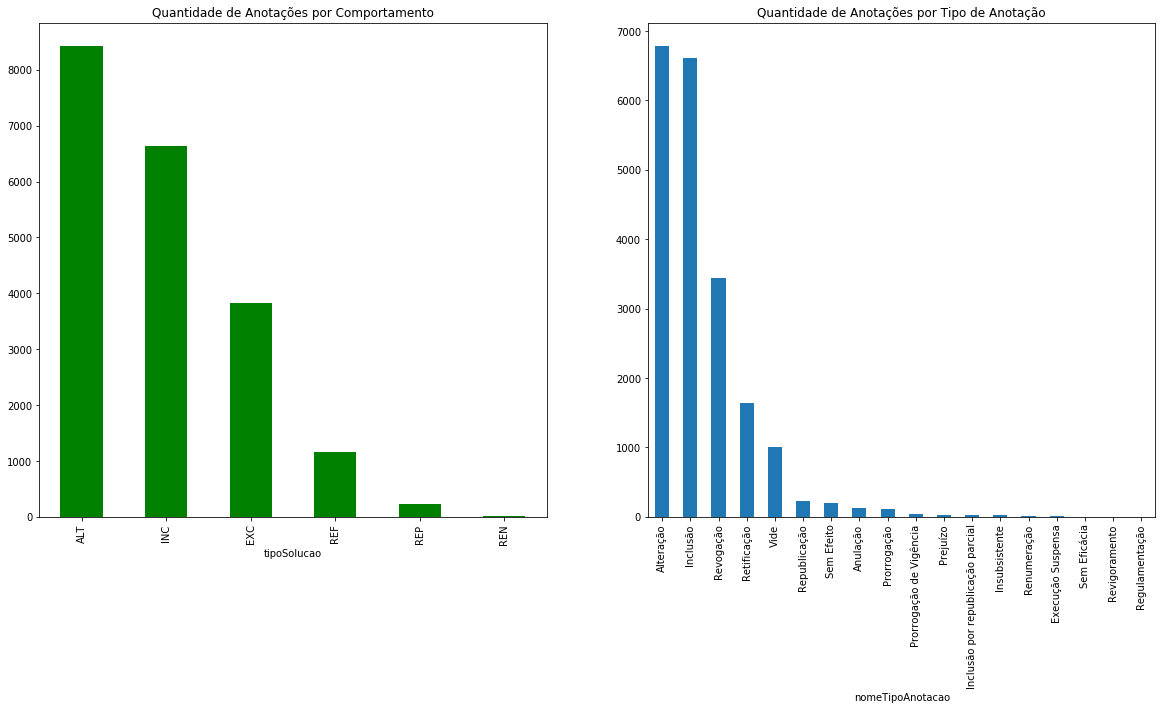

In [19]:
#Quantidade de segmentos anotados por tipo de anotacao
plt.figure()
plt.subplot(2,2,1)
tipoSolucao=df.groupby(["tipoSolucao"])["idSegmento"].nunique().sort_values(ascending=False)
tipoSolucao.plot.bar(figsize = (20,6), color="green")
plt.title('Quantidade de Anotações por Comportamento') 
plt.subplot(2,2,2)
tipoAnotacao=df.groupby(["nomeTipoAnotacao"])["idSegmento"].nunique().sort_values(ascending=False)
tipoAnotacao.plot.bar(figsize = (20,20))
plt.title('Quantidade de Anotações por Tipo de Anotação') 


In [43]:
df.groupby(["nomeTipoAnotacao"])["idTipoAnotacao"].value_counts().sort_values(ascending=False)

nomeTipoAnotacao                   idTipoAnotacao
Alteração                          1                 6785
Inclusão                           3                 6612
Revogação                          9                 3439
Retificação                        22                1638
Vide                               24                1002
Republicação                       25                 233
Sem Efeito                         13                 200
Anulação                           10                 123
Prorrogação                        4                  115
Prorrogação de Vigência            5                   42
Prejuízo                           16                  28
Inclusão por republicação parcial  55                  28
Insubsistente                      12                  23
Renumeração                        2                   18
Execução Suspensa                  11                   6
Sem Eficácia                       14                   4
Revigoramento         

In [ ]:
juntar=[]

In [38]:
df[['nomeTipoAnotacao','idTipoAnotacao']].nunique()

nomeTipoAnotacao    18
idTipoAnotacao      18
dtype: int64

Text(0.5, 1.0, 'Quantidade de Anotações por Tipo de Anotação')

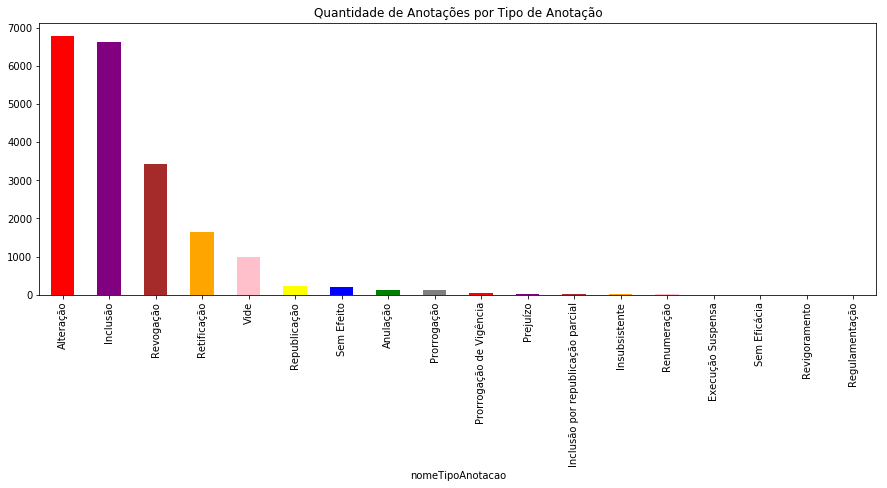

In [50]:
tipoAnotacao=df.groupby(["nomeTipoAnotacao"])["idSegmento"].nunique().sort_values(ascending=False)
tipoAnotacao.plot.bar(figsize = (15,5), color=['red','purple','brown','orange','pink','yellow','blue','green', 'grey' ] )
plt.title('Quantidade de Anotações por Tipo de Anotação') 


In [20]:
#Quantidade de segmentos anotados por tipo de ato
df.groupby(["nomeTipoAto"])["idSegmento"].nunique().sort_values(ascending=False)

nomeTipoAto
Portaria                               6956
Instrução Normativa                    6887
Ato Declaratório Executivo             4171
Resolução                              1274
Portaria Conjunta                       707
Solução de Consulta                     148
Solução de Divergência                   73
Instrução Normativa Conjunta             18
Despacho                                 16
Parecer Normativo                        11
Ordem de Serviço                         10
Ato Declaratório Interpretativo           7
Ato Declaratório Executivo Conjunto       5
Ato Declaratório                          5
Portaria Interministerial                 5
Parecer                                   2
Consulta Pública                          1
Recomendação                              1
Ordem de Serviço Conjunta                 1
Name: idSegmento, dtype: int64

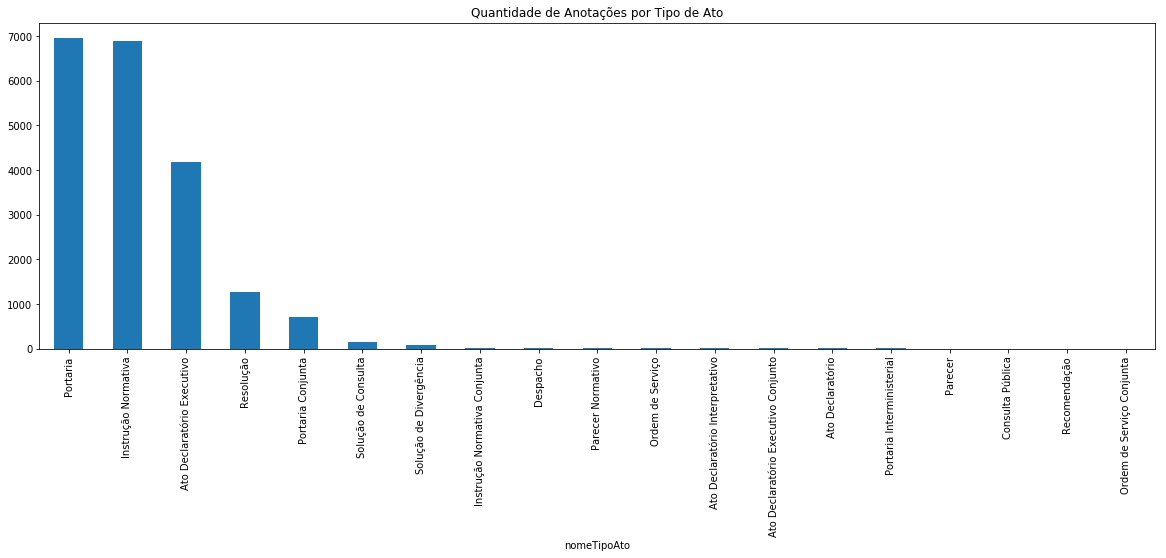

In [21]:
#Quantidade de segmentos anotados por tipo de ato
plt.figure()
tipoAto=df.groupby(["nomeTipoAto"])["idSegmento"].nunique().sort_values(ascending=False)
tipoAto.plot.bar(figsize = (20,6))
plt.title('Quantidade de Anotações por Tipo de Ato') 
plt.show()

In [22]:
#Quantidade de segmentos anotados por tipo de ato, tipo anotação
df.groupby(["nomeTipoAto","nomeTipoAnotacao"])["idSegmento"].nunique().sort_values(ascending=False)

nomeTipoAto                          nomeTipoAnotacao
Instrução Normativa                  Alteração           3036
                                     Inclusão            2880
Portaria                             Inclusão            2691
                                     Alteração           2577
Ato Declaratório Executivo           Revogação           1401
                                     Retificação         1160
Portaria                             Revogação           1021
Instrução Normativa                  Revogação            756
Ato Declaratório Executivo           Vide                 553
Resolução                            Alteração            537
                                     Inclusão             509
Portaria Conjunta                    Inclusão             379
Ato Declaratório Executivo           Alteração            377
Portaria                             Retificação          298
Portaria Conjunta                    Alteração            239
Resolução       

In [23]:
#Quantidade de segmentos anotados por tipo Comportamento, tipo de ato
df.groupby(["tipoSolucao","nomeTipoAto"])["idSegmento"].nunique().sort_values(ascending=False)

tipoSolucao  nomeTipoAto                        
ALT          Instrução Normativa                    3134
INC          Instrução Normativa                    2884
ALT          Portaria                               2877
INC          Portaria                               2699
EXC          Ato Declaratório Executivo             1712
ALT          Ato Declaratório Executivo             1538
EXC          Portaria                               1075
             Instrução Normativa                     765
REF          Ato Declaratório Executivo              614
ALT          Resolução                               547
INC          Resolução                               509
             Portaria Conjunta                       379
ALT          Portaria Conjunta                       255
REF          Portaria                                248
EXC          Resolução                               183
INC          Ato Declaratório Executivo              160
REP          Ato Declaratório Executivo

In [24]:
#Quantidade de segmentos anotados por tipo anotação, tipo de ato
df.groupby(["nomeTipoAnotacao","nomeTipoAto"])["idSegmento"].nunique().sort_values(ascending=False)

nomeTipoAnotacao  nomeTipoAto                        
Alteração         Instrução Normativa                    3036
Inclusão          Instrução Normativa                    2880
                  Portaria                               2691
Alteração         Portaria                               2577
Revogação         Ato Declaratório Executivo             1401
Retificação       Ato Declaratório Executivo             1160
Revogação         Portaria                               1021
                  Instrução Normativa                     756
Vide              Ato Declaratório Executivo              553
Alteração         Resolução                               537
Inclusão          Resolução                               509
                  Portaria Conjunta                       379
Alteração         Ato Declaratório Executivo              377
Retificação       Portaria                                298
Alteração         Portaria Conjunta                       239
Revogação       

In [25]:
df['nomeTipoSegmento'].unique()

array(['Artigo', 'Não Identificado', 'Parágrafo', 'Inciso', 'Citação',
       'Alínea', 'Anexo', 'Ementa', 'Título', 'Seção', 'SubSeção',
       'Assinatura', 'Capítulo', 'Autor', 'Fecho', 'Item'], dtype=object)

In [26]:
df['nomeTipoAnotacao'].unique()

array(['Vide', 'Alteração', 'Inclusão', 'Revogação', 'Renumeração',
       'Retificação', 'Republicação', 'Sem Efeito', 'Insubsistente',
       'Anulação', 'Prorrogação', 'Prejuízo', 'Prorrogação de Vigência',
       'Regulamentação', 'Execução Suspensa', 'Sem Eficácia',
       'Revigoramento', 'Inclusão por republicação parcial'], dtype=object)

In [27]:
df['nomeTipoSegmento'].value_counts()

Não Identificado    5400
Inciso              5311
Parágrafo           3795
Artigo              3641
Alínea               945
Anexo                431
Ementa               423
Item                 198
Título                72
Seção                 41
Assinatura            17
SubSeção              10
Capítulo               9
Citação                7
Fecho                  1
Autor                  1
Name: nomeTipoSegmento, dtype: int64

In [28]:
#Anotação tipo de segmento
df.groupby(["nomeTipoAnotacao","nomeTipoSegmento"])["idSegmento"].nunique().sort_values(ascending=False)


nomeTipoAnotacao                   nomeTipoSegmento
Inclusão                           Inciso              2312
Revogação                          Artigo              2147
Alteração                          Não Identificado    2054
Inclusão                           Parágrafo           1982
Alteração                          Inciso              1967
                                   Parágrafo           1767
Retificação                        Não Identificado    1408
Inclusão                           Não Identificado    1372
Revogação                          Inciso               959
Vide                               Artigo               615
Inclusão                           Alínea               535
Alteração                          Alínea               341
                                   Artigo               299
                                   Anexo                255
Revogação                          Não Identificado     250
Republicação                       Ementa       

In [29]:
#Quantidade de segmentos anotados na ementa por tipo de anotação
df[df['nomeTipoSegmento']=='Ementa'].groupby(["nomeTipoAnotacao","nomeTipoSegmento"])["idSegmento"].nunique()#.sort_values(ascending=False)

nomeTipoAnotacao                   nomeTipoSegmento
Alteração                          Ementa                3
Anulação                           Ementa                3
Inclusão por republicação parcial  Ementa                1
Insubsistente                      Ementa                2
Prorrogação de Vigência            Ementa                1
Regulamentação                     Ementa                3
Republicação                       Ementa              233
Retificação                        Ementa                1
Revigoramento                      Ementa                1
Revogação                          Ementa                5
Sem Efeito                         Ementa                1
Vide                               Ementa              168
Name: idSegmento, dtype: int64

In [30]:
#Existe republicação em outro tipo de segmento?
df[df['nomeTipoAnotacao']=='Republicação'].groupby(["nomeTipoAnotacao","nomeTipoSegmento"])["idSegmento"].nunique()#.sort_values(ascending=False)
#Nao

nomeTipoAnotacao  nomeTipoSegmento
Republicação      Ementa              233
Name: idSegmento, dtype: int64

In [31]:
#Existe Vide em outro tipo de segmento?
df[df['nomeTipoAnotacao']=='Vide'].groupby(["nomeTipoAnotacao","nomeTipoSegmento"])["idSegmento"].nunique()#.sort_values(ascending=False)
#Sim

nomeTipoAnotacao  nomeTipoSegmento
Vide              Alínea                4
                  Anexo                 5
                  Artigo              615
                  Assinatura            1
                  Ementa              168
                  Inciso               23
                  Não Identificado    182
                  Parágrafo             4
Name: idSegmento, dtype: int64

In [32]:
#Pela análise exploratória dos dados será escopo deste trabalho:

#3 tipos de atos, por serem os 3 de maior presença na base
#nomeTipoAto
#Portaria                               4087
#Instrução Normativa                    3078
#Ato Declaratório Executivo             1927

#3 tipos de anotação, por serem os 3 de maior presença na base 
#nomeTipoAnotacao
#Alteração                  3134
#Inclusão                   2924
#Revogação                  2060

#tipoAtoAlvo = ['Portaria','Instrução Normativa','Ato Declaratório Executivo']
#anotacaoAlvo = ['Alteração','Inclusão','Revogação']
#dfAlvo = df[df['nomeTipoAto'].isin(tipoAtoAlvo) & df['nomeTipoAnotacao'].isin(anotacaoAlvo)]

In [33]:
dfAlvo = df

In [34]:
dfAlvo["nomeTipoSegmento"].unique()

array(['Artigo', 'Não Identificado', 'Parágrafo', 'Inciso', 'Citação',
       'Alínea', 'Anexo', 'Ementa', 'Título', 'Seção', 'SubSeção',
       'Assinatura', 'Capítulo', 'Autor', 'Fecho', 'Item'], dtype=object)

In [35]:
#Anotação tipo de segmento depois do corte
df.groupby(["nomeTipoSegmento","nomeTipoAnotacao"])["idSegmento"].nunique()


nomeTipoSegmento  nomeTipoAnotacao                 
Alínea            Alteração                             341
                  Anulação                                1
                  Inclusão                              535
                  Insubsistente                           2
                  Retificação                             1
                  Revogação                              61
                  Vide                                    4
Anexo             Alteração                             255
                  Inclusão                               50
                  Inclusão por republicação parcial      16
                  Retificação                           104
                  Sem Efeito                              1
                  Vide                                    5
Artigo            Alteração                             299
                  Anulação                               92
                  Execução Suspensa             

In [36]:
idAtoAlvo = dfAlvo['idAto'].unique()

Média de palavras nos segmentos Vide: 527.51 e desvio padrão: 993.87
Média de palavras nos segmentos Alteração: 206.81 e desvio padrão: 148.06
Média de palavras nos segmentos Inclusão: 170.62 e desvio padrão: 117.62
Média de palavras nos segmentos Revogação: 124.82 e desvio padrão: 107.35
Média de palavras nos segmentos Retificação: 166.89 e desvio padrão: 201.83
Média de palavras nos segmentos Sem Efeito: 259.40 e desvio padrão: 207.88
Média de palavras nos segmentos Insubsistente: 328.83 e desvio padrão: 261.11
Média de palavras nos segmentos Anulação: 285.89 e desvio padrão: 244.33
Média de palavras nos segmentos Prorrogação: 357.68 e desvio padrão: 196.81
Média de palavras nos segmentos Republicação: 305.01 e desvio padrão: 652.69
Média de palavras nos segmentos Prejuízo: 110.61 e desvio padrão: 77.55
Média de palavras nos segmentos Inclusão por republicação parcial: 35.54 e desvio padrão: 94.72
Média de palavras nos segmentos Prorrogação de Vigência: 371.43 e desvio padrão: 227.12

/home/94779325587/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


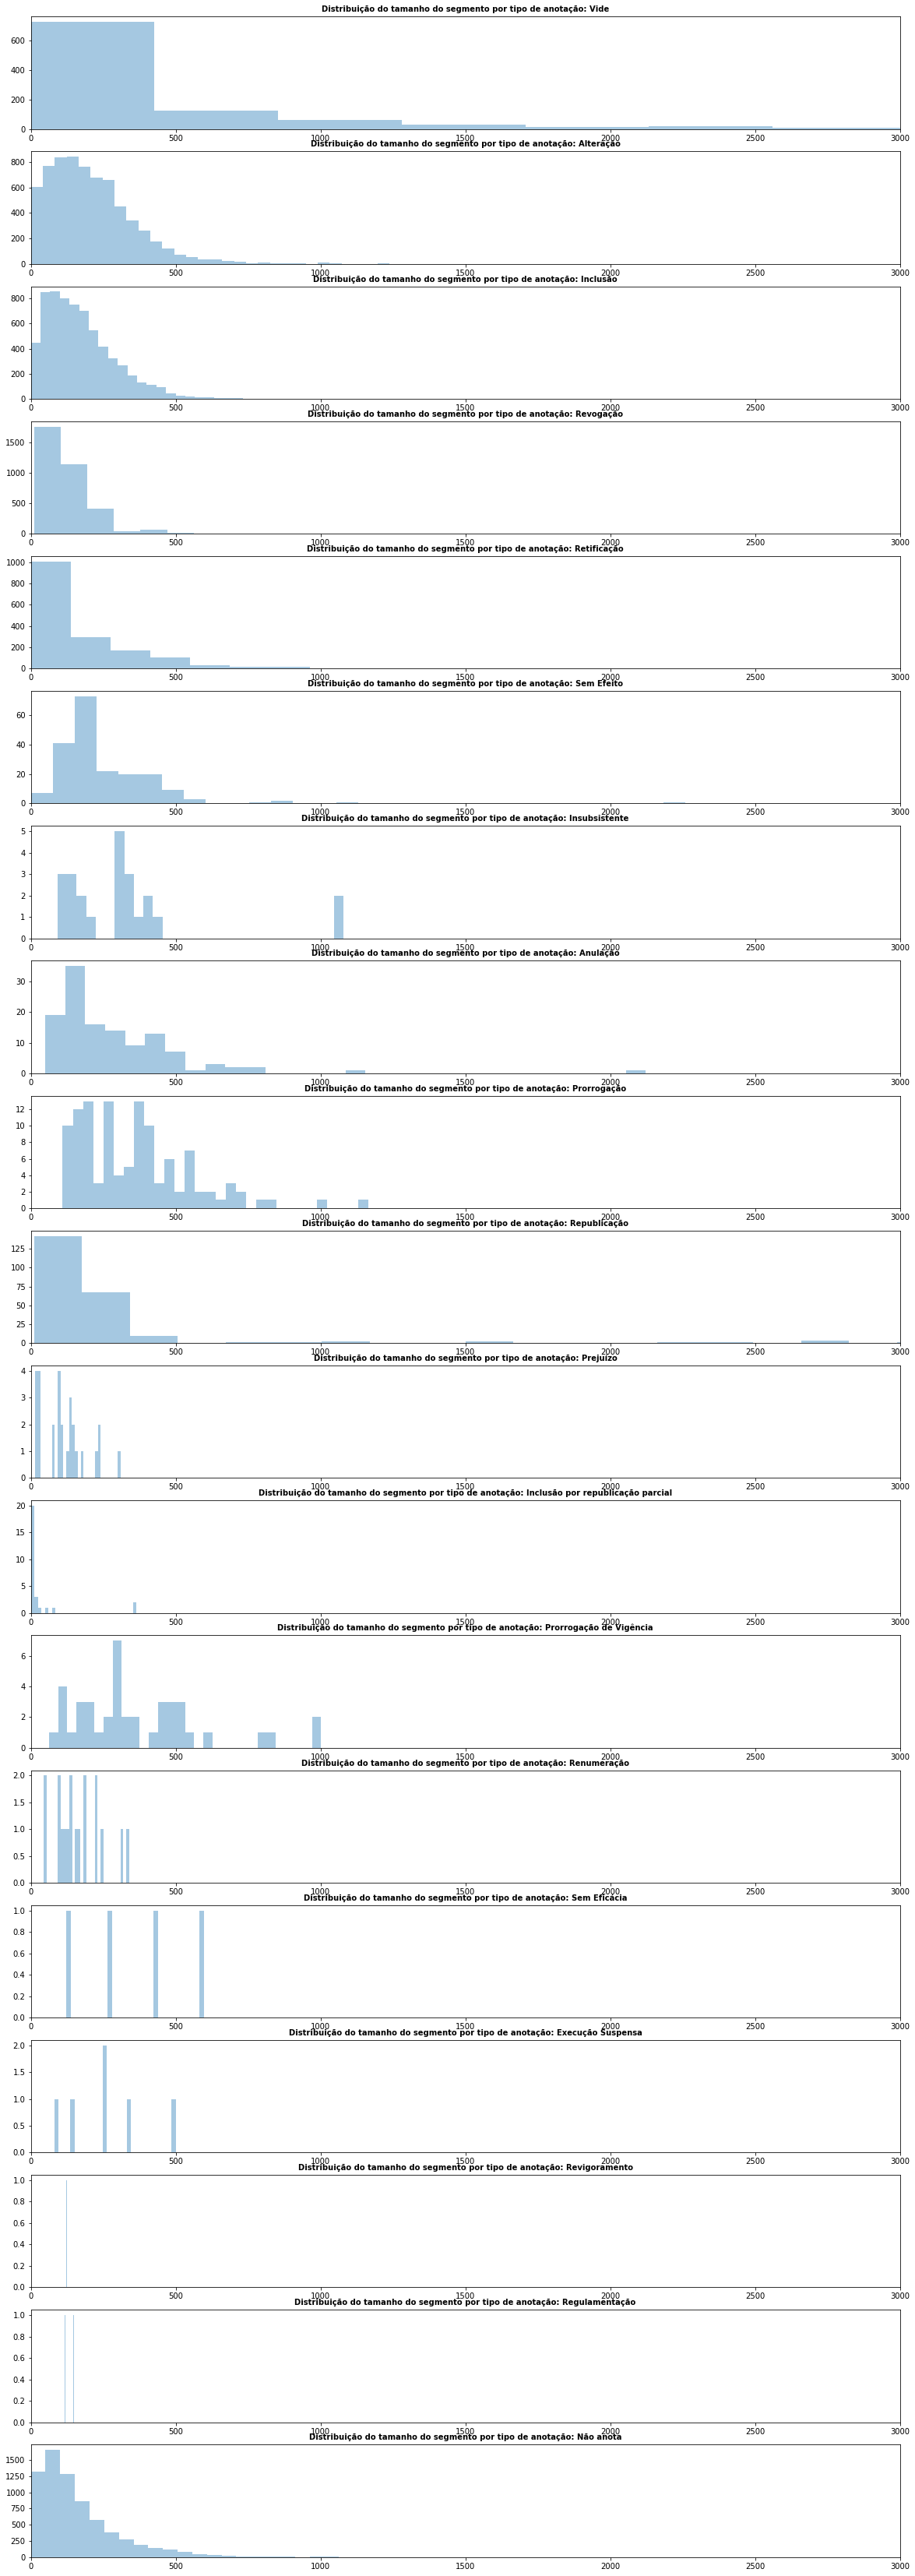

In [95]:
# colocando a polaridade em uma lista dos unicos existentes
anotacoes = dfAlvo['nomeTipoAnotacao'].unique().tolist()

# definindo a área de plotagem
fig, ax = plt.subplots(nrows=len(anotacoes), figsize=(20,60))

# loop para criar os histogramas com seus respectivos parâmetros
for i in range(len(anotacoes)):
    #if i >0:
        sns.distplot(dfAlvo[dfAlvo.nomeTipoAnotacao == anotacoes[i]]['textoIntegra'].apply(len), ax=ax[i], kde=False, bins=30)
        ax[i].set_xlim(0, 3000)
        ax[i].set_title(f'Distribuição do tamanho do segmento por tipo de anotação: {anotacoes[i]}', fontsize=10, fontweight='bold')
        ax[i].set_xlabel(None)
        print(f"Média de palavras nos segmentos {anotacoes[i]}: {dfAlvo[dfAlvo.nomeTipoAnotacao == anotacoes[i]]['textoIntegra'].apply(len).mean():.2f} e desvio padrão: {dfAlvo[dfAlvo.nomeTipoAnotacao == anotacoes[i]]['textoIntegra'].apply(len).std():.2f}")
# ajusta o espaçamento entre os plots
plt.tight_layout(pad=20)

In [96]:
dfAlvo['tamanhoTexto'] = dfAlvo['textoIntegra'].apply(len)

In [ ]:
b = sns.boxplot(x=tips["total_bill"])
b.axes.set_title("Title",fontsize=50)
b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=5)
sns.plt.show()

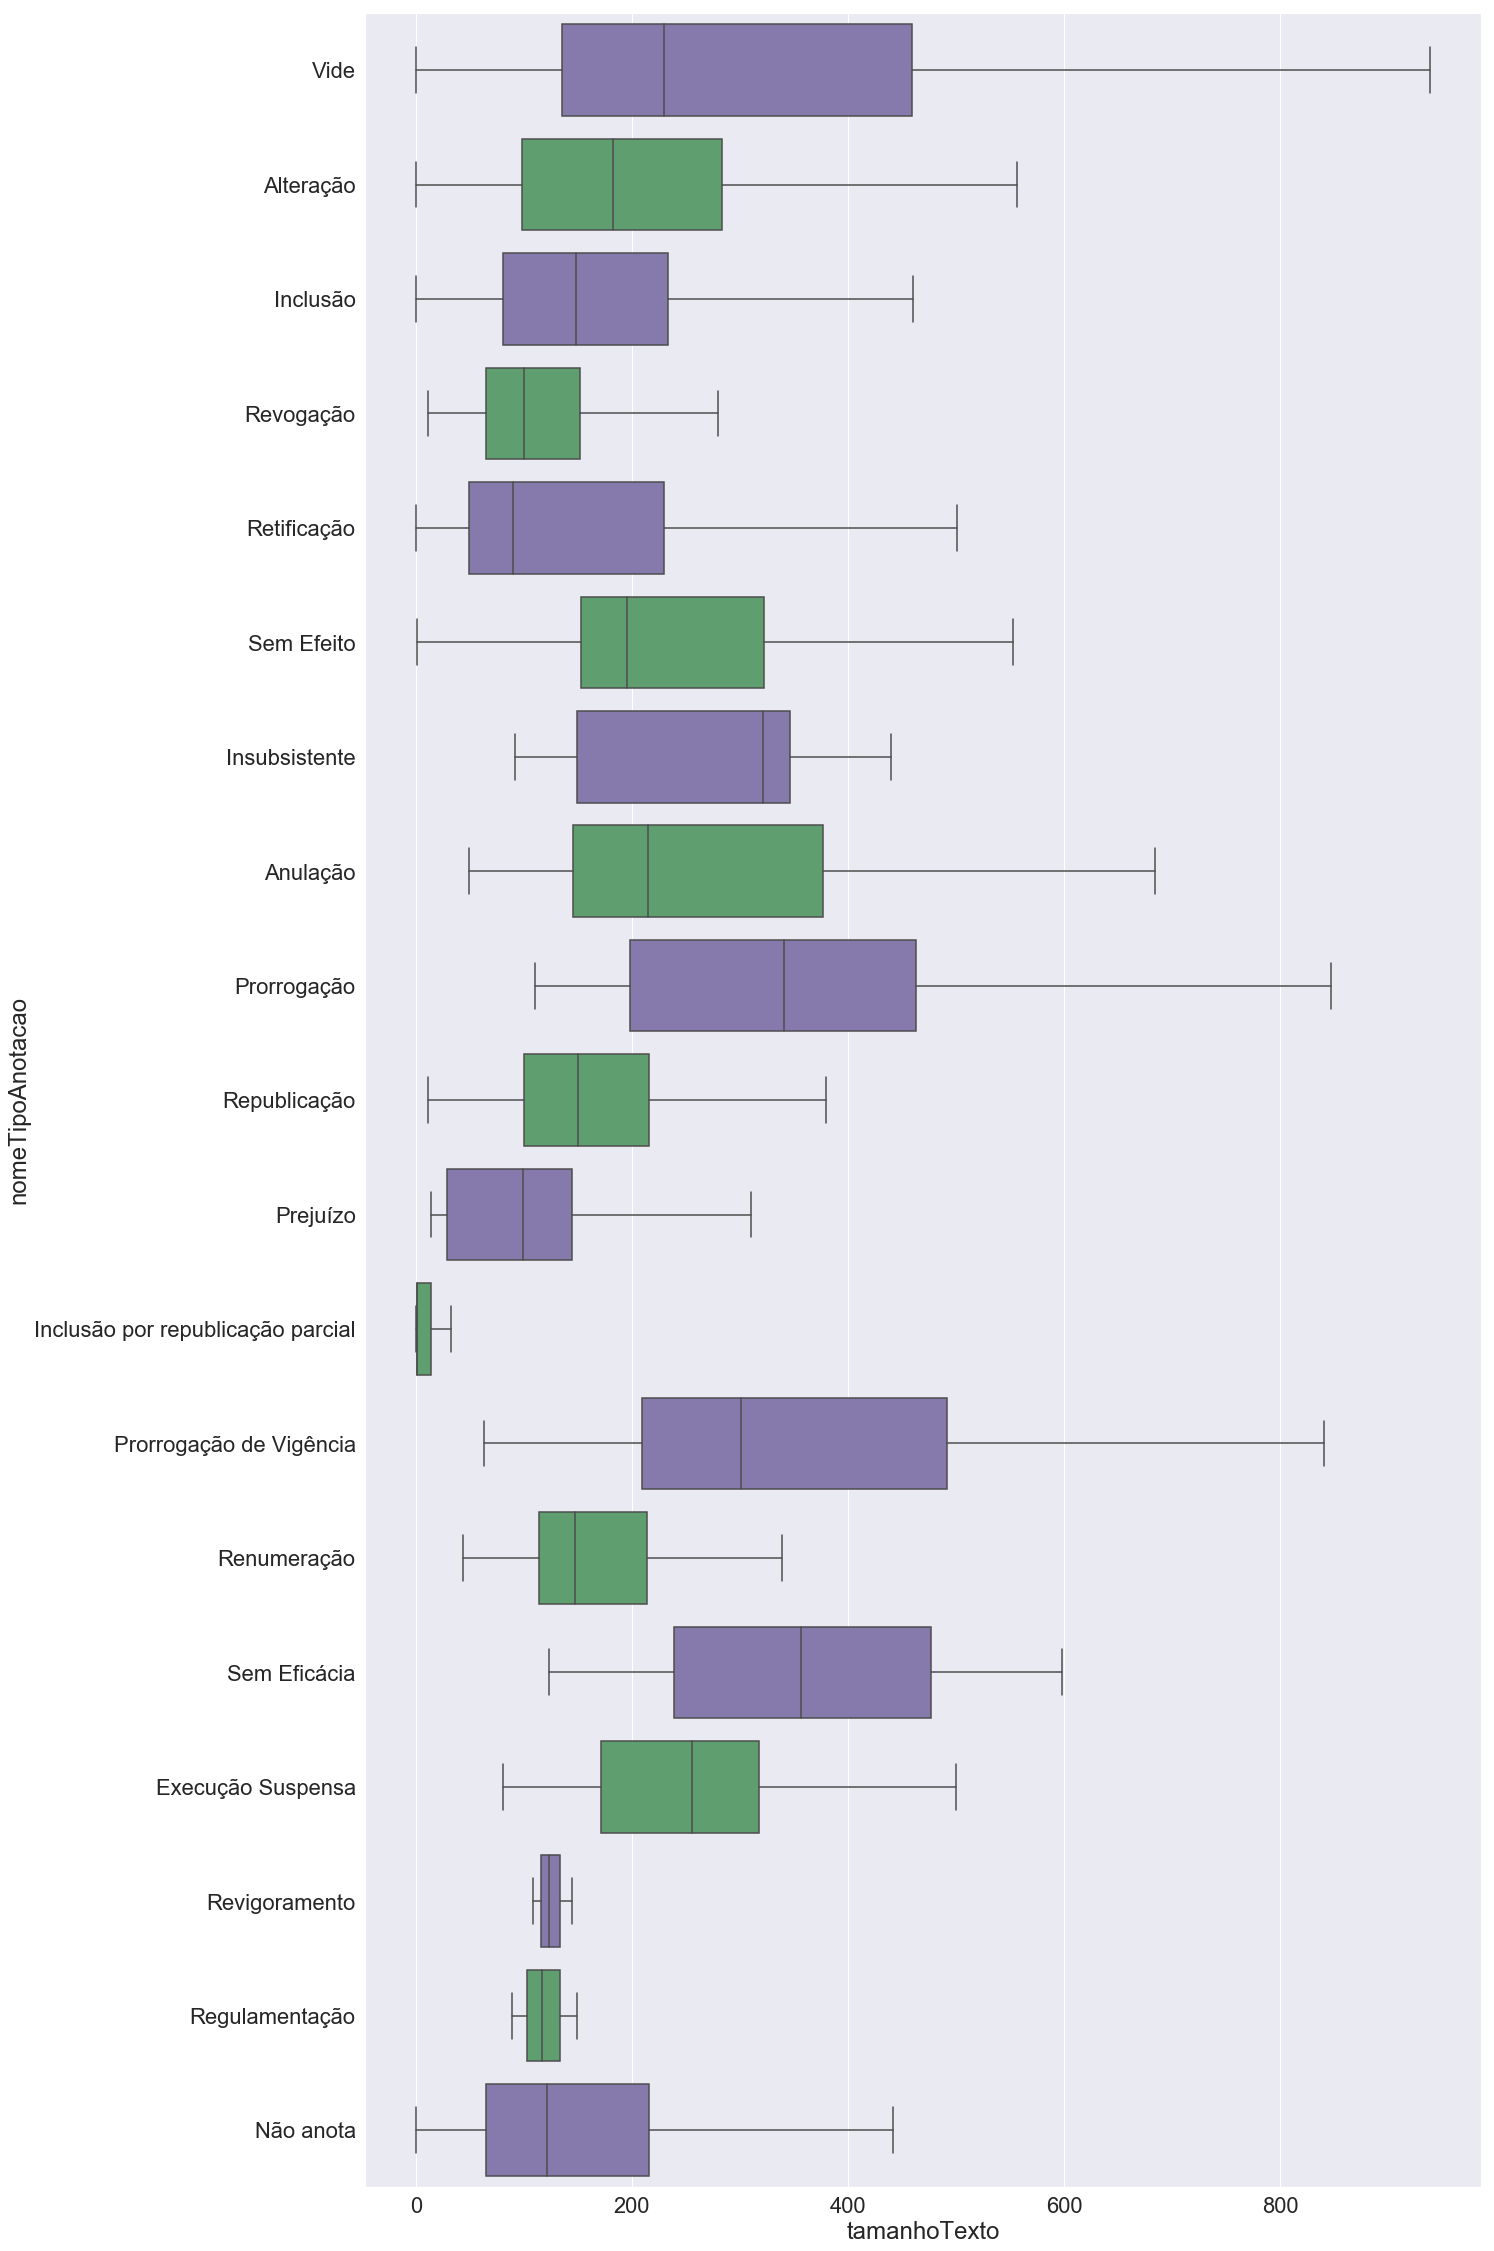

In [151]:
#sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(20,40))
sns.set(font_scale = 2)
sns.boxplot(y="nomeTipoAnotacao", x="tamanhoTexto",
            palette=["m", "g"],
            data=dfAlvo, showfliers = False)
#sns.despine(offset=10, trim=True)

In [37]:
#tamanho médio da ementa
dfAlvo['ementa'].apply(len).mean()

211.41828391291497

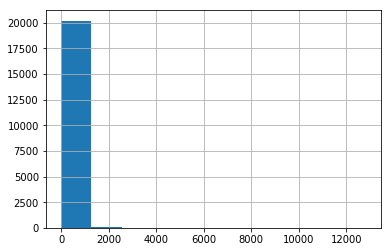

In [38]:
#Tamanho da ementa
dfAlvo['ementa'].apply(len).hist()

In [39]:
#tamanho médio do texto
dfAlvo['textoIntegra'].apply(len).mean()

196.81809673923752

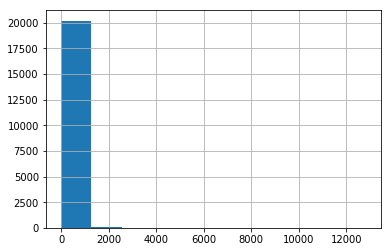

In [40]:
#Tamanho da ementa
dfAlvo['textoIntegra'].apply(len).hist()

KeyError: 'ementa'

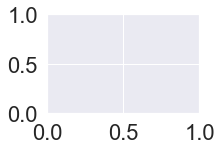

In [152]:
plt.figure()
plt.subplot(2,2,1)
dfAlvo['ementa'].apply(len).hist(figsize = (10,10))

plt.title('Tamanho Ementa') 
plt.subplot(2,2,2)
dfAlvo['textoIntegra'].apply(len).hist(figsize = (10,10))

plt.title('Tamanho Segmentos') 

# Tratamento texto

In [42]:
#Texto que tem anotação

In [43]:
 dfAlvo['ementalimpa'] = dfAlvo['ementa'].apply(tratatexto.limpaTexto)

In [44]:
#tratatexto.geraNuvem(dfAlvo['ementalimpa'],'Palavras Ementa')

In [45]:
dfAlvo['verbosEmenta'] = dfAlvo['ementalimpa'].apply(tratatexto.buscaVerbo)

In [46]:
#tratatexto.geraNuvem(dfAlvo['verbosEmenta'],'Verbos Ementa')

In [47]:
 dfAlvo['textoIntegraLimpo'] = dfAlvo['textoIntegra'].apply(tratatexto.limpaTexto)

In [48]:
#tratatexto.geraNuvem(dfAlvo['textoIntegraLimpo'],'Palavras Segmentos')

In [49]:
dfAlvo['verbosTextoIntegra'] = dfAlvo['textoIntegraLimpo'].apply(tratatexto.buscaVerbo)

In [50]:
#tratatexto.geraNuvem(dfAlvo['verbosTextoIntegra'],'Verbos Segmentos')

In [51]:
#tratatexto.geraNuvem(dfAlvo['verbosEmenta'].append(dfAlvo['verbosTextoIntegra']),'Todos os Verbos')

In [52]:
#Textos que não anotam

In [53]:
dfNaoAnota  = pd.read_json(caminhoDados+'segmentosNaoAnotamdosAtosqueAnotam.json') 

In [54]:
dfNaoAnota['ano'].unique() #a partir de 2018

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [55]:
##Verificando valores nulos
dfNaoAnota.isna().sum()

ano                 0
ementa              0
idAto               0
idSegmento          0
idTipoAto           0
idTipoSegmento      0
nomeTipoAto         0
nomeTipoSegmento    0
textoIntegra        0
dtype: int64

In [56]:
#Filtro para unificar os DF
dfAlvoNaoAnota = dfNaoAnota[dfNaoAnota['idAto'].isin(idAtoAlvo)]

In [57]:
dfAlvoNaoAnota.head()

,ano,ementa,idAto,idSegmento,idTipoAto,idTipoSegmento,nomeTipoAto,nomeTipoSegmento,textoIntegra
0,2013,Autoriza exportação de cigarros do estabelecim...,39246,1260058,9,2,Ato Declaratório Executivo,Autor,O COORDENADOR-GERAL DE FISCALIZAÇÃO SUBSTITUTO...
1,2013,Autoriza exportação de cigarros do estabelecim...,39246,1260059,9,3,Ato Declaratório Executivo,Artigo,Art. 1º Fica o estabelecimento da empresa Souz...
100,2013,Dispõe sobre o reajuste dos benefícios pagos p...,39283,1262700,80,11,Portaria Interministerial,Título,ANEXO I
100072,2014,Declara inapta a inscrição de empresa no Cadas...,54153,1427100,9,999,Ato Declaratório Executivo,Não Identificado,O Chefe do Serviço de Controle e Acompanhament...
100073,2014,Declara inapta a inscrição de empresa no Cadas...,54153,1427101,9,3,Ato Declaratório Executivo,Artigo,Art. 1º Retificado o Ato Declaratório Executiv...


In [58]:
dfAlvoNaoAnota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100450 entries, 0 to 99759
Data columns (total 9 columns):
ano                 100450 non-null int64
ementa              100450 non-null object
idAto               100450 non-null int64
idSegmento          100450 non-null int64
idTipoAto           100450 non-null int64
idTipoSegmento      100450 non-null int64
nomeTipoAto         100450 non-null object
nomeTipoSegmento    100450 non-null object
textoIntegra        100450 non-null object
dtypes: int64(5), object(4)
memory usage: 7.7+ MB


In [59]:
#tipos de segmento são importantes para o negócio
dfAlvoNaoAnota['nomeTipoSegmento'].value_counts()

Inciso              26959
Não Identificado    26124
Artigo              20370
Parágrafo           11345
Fecho                4677
Alínea               3896
Anexo                1894
Título               1526
Capítulo             1075
Seção                 894
Assinatura            783
Item                  428
SubSeção              348
Autor                  80
Livro                  39
Citação                 6
Parte                   6
Name: nomeTipoSegmento, dtype: int64

In [60]:
#Classes dos segmentos que anotam, hpa desbaleceamento
dfAlvo['idTipoAnotacao'].value_counts()

1     6785
3     6612
9     3439
22    1638
24    1002
25     233
13     200
10     123
4      115
5       42
16      28
55      28
12      23
2       18
11       6
14       4
6        3
20       3
Name: idTipoAnotacao, dtype: int64

In [61]:
#Preciso fazer um undersample dos sefmentos que não anotam,  Pegar 7 % por conta do balanceamento de classes
dfAlvoNaoAnota = dfAlvoNaoAnota.sample(frac=0.07, random_state=random_state)

In [62]:
dfAlvoNaoAnota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 388240 to 196877
Data columns (total 9 columns):
ano                 7032 non-null int64
ementa              7032 non-null object
idAto               7032 non-null int64
idSegmento          7032 non-null int64
idTipoAto           7032 non-null int64
idTipoSegmento      7032 non-null int64
nomeTipoAto         7032 non-null object
nomeTipoSegmento    7032 non-null object
textoIntegra        7032 non-null object
dtypes: int64(5), object(4)
memory usage: 549.4+ KB


In [63]:
dfAlvoNaoAnota['nomeTipoSegmento'].value_counts()

Não Identificado    1856
Inciso              1812
Artigo              1444
Parágrafo            800
Fecho                326
Alínea               281
Anexo                147
Título               110
Capítulo              87
Seção                 65
Assinatura            46
Item                  35
SubSeção              15
Autor                  4
Livro                  4
Name: nomeTipoSegmento, dtype: int64

In [64]:
 dfAlvoNaoAnota['textoIntegraLimpo'] = dfAlvoNaoAnota['textoIntegra'].apply(tratatexto.limpaTexto)

In [65]:
#tratatexto.geraNuvem(dfAlvoNaoAnota['textoIntegraLimpo'],'Palavras Segmentos não anotam')

In [66]:
dfAlvoNaoAnota['verbosTextoIntegra'] = dfAlvoNaoAnota['textoIntegraLimpo'].apply(tratatexto.buscaVerbo)

In [67]:
#tratatexto.geraNuvem(dfAlvoNaoAnota['verbosTextoIntegra'],'Verbos Segmentos não anotam')

In [68]:
dfAlvo = pd.concat([dfAlvo, dfAlvoNaoAnota],sort=False)



In [69]:
dfAlvo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27334 entries, 0 to 196877
Data columns (total 18 columns):
ano                   27334 non-null int64
ementa                27334 non-null object
idAto                 27334 non-null int64
idSegmento            27334 non-null int64
idTipoAnotacao        20302 non-null float64
idTipoAto             27334 non-null int64
idTipoSegmento        27334 non-null int64
nomeTipoAnotacao      20302 non-null object
nomeTipoAto           27334 non-null object
nomeTipoSegmento      27334 non-null object
siglaTipoAnotacao     20302 non-null object
textoIntegra          27334 non-null object
tipoSolucao           20302 non-null object
versaoSegmento        20302 non-null float64
ementalimpa           20302 non-null object
verbosEmenta          20302 non-null object
textoIntegraLimpo     27334 non-null object
verbosTextoIntegra    27334 non-null object
dtypes: float64(2), int64(5), object(11)
memory usage: 4.0+ MB


In [70]:
#Para os segmentos que não anotam não faz sentido usar a ementa nem seus verbos
valores = {'idTipoAnotacao': 0, 'nomeTipoAnotacao':'Não anota','verbosEmenta':'','ementalimpa':''}
dfAlvo.fillna(value = valores, inplace = True)

In [71]:
#colunas que não importam para o tratamento de textos
limpar = ['ano','ementa','idAto','idTipoAto','idTipoSegmento','nomeTipoAto','nomeTipoSegmento','siglaTipoAnotacao','tipoSolucao','versaoSegmento']
dfAlvo.drop(limpar,axis=1, inplace=True)

In [72]:
dfAlvo.reset_index(drop=True, inplace=True)

In [73]:
dfAlvo['verbos'] = dfAlvo['verbosEmenta']+ " "  + dfAlvo['verbosTextoIntegra']
dfAlvo['textoTotal'] = dfAlvo['ementalimpa']+ " "  + dfAlvo['textoIntegraLimpo']
dfAlvo.to_json(caminhoDados+'dfAlvo.json')
dfAlvo  = pd.read_json(caminhoDados+'dfAlvo.json') 
dfAlvo.head()

,idSegmento,idTipoAnotacao,nomeTipoAnotacao,textoIntegra,ementalimpa,verbosEmenta,textoIntegraLimpo,verbosTextoIntegra,verbos,textoTotal
0,1260061,24,Vide,Art. 2º A autorização de que trata o art. 1º f...,autoriza exportacao cigarros estabelecimento e...,autoriza,art autorizacao trata art fica condicionada co...,trata fica condicionada referida,autoriza trata fica condicionada referida,autoriza exportacao cigarros estabelecimento e...
1,1260829,1,Alteração,“Art. 17. As entidades fechadas de previdência...,altera instrucao normativa srf dezembro dispoe...,altera dispoe clausula,art entidades fechadas previdencia complementa...,complementar renda,altera dispoe clausula complementar renda,altera instrucao normativa srf dezembro dispoe...
10,1264027,3,Inclusão,§ 3º Na hipótese de exigência de controle admi...,altera instrucao normativa srf janeiro dispoe ...,altera dispoe,hipotese exigencia controle administrativo par...,exigencia parte admitida devera efetivado saida,altera dispoe exigencia parte admitida devera ...,altera instrucao normativa srf janeiro dispoe ...
100,1271821,3,Inclusão,Permitida a habilitação de usuários externos: Não,altera anexo portaria cgsn julho define perfis...,altera portaria define,permitida habilitacao usuarios externos nao,,altera portaria define,altera anexo portaria cgsn julho define perfis...
1000,1335167,1,Alteração,§ 2º A interrupção da manutenção preventiva e...,altera instrucao normativa agosto dispoe insta...,altera dispoe bebidas,interrupcao manutencao preventiva corretiva si...,cmb reiterada ausencia trata caracteriza,altera dispoe bebidas cmb reiterada ausencia t...,altera instrucao normativa agosto dispoe insta...


In [74]:
dfAlvo.columns

Index(['idSegmento', 'idTipoAnotacao', 'nomeTipoAnotacao', 'textoIntegra',
       'ementalimpa', 'verbosEmenta', 'textoIntegraLimpo',
       'verbosTextoIntegra', 'verbos', 'textoTotal'],
      dtype='object')

In [75]:
dfAlvo['idTipoAnotacao'].unique()

array([24,  1,  3,  9, 22, 13, 12, 10,  4, 25, 16, 55,  5,  2, 14, 11, 20,
        6,  0])